In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.5)

In [2]:
df = pd.read_csv("results.csv")
df.head()

,framework,run,endpoint,response_time_ms
0,vanilla_go,1,Local Memory,2.43
1,vanilla_go,1,Small insert - 1 row,3.78
2,vanilla_go,1,"Large insert - 10,000 rows",109.02
3,vanilla_go,2,Local Memory,2.18
4,vanilla_go,2,Small insert - 1 row,2.66


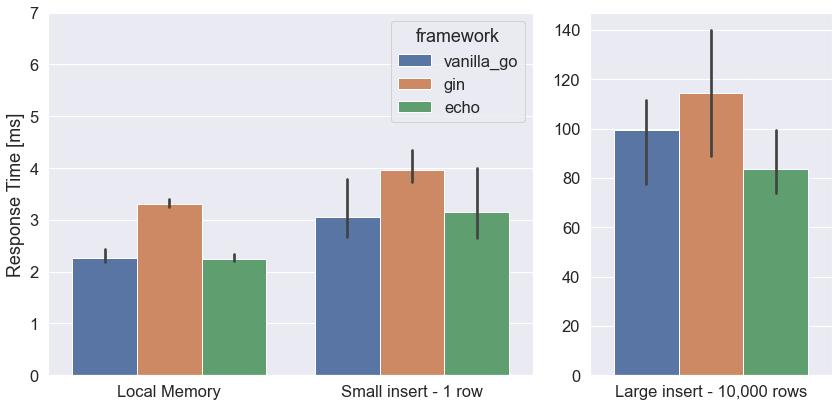

In [3]:
df_s = df[df.endpoint.str.contains("Local")|df.endpoint.str.contains("Small")]
df_l = df[df.endpoint.str.contains("Large")]

fig, ax = plt.subplots(figsize=(12, 6), ncols=2, gridspec_kw={'width_ratios': [2, 1]})
sns.barplot(x="endpoint", y="response_time_ms", hue="framework", data=df_s, ax=ax[0])
sns.barplot(x="endpoint", y="response_time_ms", hue="framework", data=df_l, ax=ax[1])

ax[0].set_ylim(0, 7)

ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[0].set_ylabel("Response Time [ms]")
ax[1].set_ylabel("")
ax[1].legend().remove()

plt.tight_layout()

In [4]:
df.groupby(["framework", "endpoint"]).mean()[["response_time_ms"]]

response_time_ms
framework  endpoint                                    
echo       Large insert - 10,000 rows         83.766667
           Local Memory                        2.253333
           Small insert - 1 row                3.160000
gin        Large insert - 10,000 rows        114.323333
           Local Memory                        3.306667
           Small insert - 1 row                3.966667
vanilla_go Large insert - 10,000 rows         99.396667
           Local Memory                        2.263333
           Small insert - 1 row                3.056667

In [5]:
fig.savefig("results.png")